<a href="https://colab.research.google.com/github/Sanjeet2835/Classification---ML/blob/main/Sigmoid_vs_Step_vs_Scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import numpy as np
from sklearn.datasets import make_classification

In [160]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_classes=2, n_clusters_per_class=1, hypercube=False, random_state=41,
                           class_sep=20, n_redundant=0)

In [161]:
X

array([[ 0.51123145, -0.11697552],
       [ 0.06316371, -0.73115232],
       [-0.0425064 , -0.7081059 ],
       [-3.2891569 , -2.01199214],
       [ 0.1111445 ,  1.63493163],
       [-2.53070306,  0.15599044],
       [-3.49036198,  1.07782053],
       [ 0.3976447 ,  0.80626713],
       [-0.24666899,  0.74859527],
       [-3.65803446,  0.75152794],
       [-3.47658131, -0.90114581],
       [-3.47815037, -0.1815243 ],
       [ 0.29004249, -2.98092432],
       [ 1.11761831,  1.20500136],
       [-3.52530398,  0.78302407],
       [ 0.69929128,  0.42968688],
       [ 0.17089733, -0.73229726],
       [-3.57785124, -0.83930476],
       [ 0.12965489,  0.83727062],
       [-3.46888717, -0.10255323],
       [-3.97487212,  0.65867001],
       [-3.76348686,  0.92649819],
       [-3.01519735,  0.10216193],
       [ 1.92241659,  0.46886454],
       [-2.91479578,  0.45432938],
       [ 0.9259563 ,  1.8613386 ],
       [-3.4859014 , -0.79255991],
       [-2.73978345, -1.0004391 ],
       [-4.09896768,

In [162]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

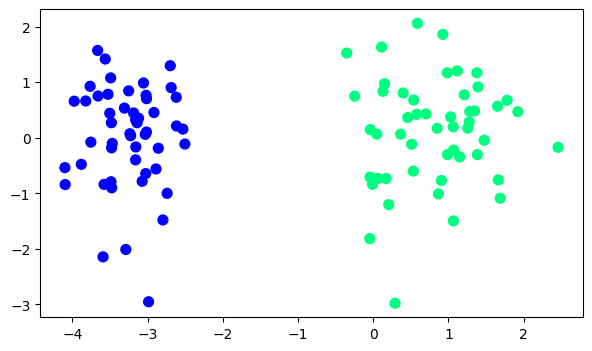

In [163]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=50)

In [164]:
print(X.shape[0]) #number of rows
print(X.shape[1]) #number of columns

100
2


In [165]:
def Perceptron(X,y):
  X=np.insert(X,0,1, axis=1)
  weights=np.ones(X.shape[1])
  lr=0.1
  for i in range(1000):
    j=np.random.randint(0,100)
    y_hat=sigmoid(np.dot(X[j], weights))
    weights=weights+lr*(y[j]-y_hat)*X[j]

  return weights[1:], weights[0]

In [166]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [167]:
coef_, intercept_ = Perceptron(X,y)
print(coef_)
print(intercept_)

[2.83206332 0.06238421]
2.7591558707557984


In [168]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [169]:
#getting x and y values to create a line
x_input = np.linspace(-5,5,100)
y_input = m*x_input + b

(-3.0, 2.0)

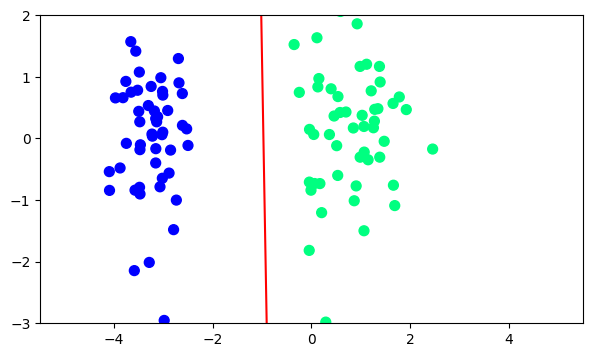

In [170]:
plt.figure(figsize=(7,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=50)
plt.plot(x_input, y_input,c='r')
plt.ylim(-3,2)

In [171]:
#Using step function / Perception Learning Algorithm

def Perceptron(X,y):
  X=np.insert(X,0,1, axis=1)
  weights=np.ones(X.shape[1])
  lr=0.1
  for i in range(2000):
    j=np.random.randint(0,100)
    y_hat=step(np.dot(X[j], weights))
    weights=weights+lr*(y[j]-y_hat)*X[j]

  return weights[1:], weights[0]
def step(z):
  return 1 if z>0 else 0
coef_, intercept_ = Perceptron(X,y)
print(coef_)
print(intercept_)
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])
x_input1 = np.linspace(-5,5,100)
y_input1 = m*x_input + b

[0.98628302 0.45500818]
1.3000000000000003


In [172]:
#Using Scikit learn for logistic regression
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(X,y)
print(f"coef_:{lor.coef_}")
print(f"intercept_:{lor.intercept_}")
m=-(lor.coef_[0][0]/lor.coef_[0][1])
b=-(lor.intercept_/lor.coef_[0][1])
print(f"m:{m}")
print(f"b:{b}")
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

coef_:[[2.36679363 0.02300492]]
intercept_:[3.13571596]
m:-102.88205179540375
b:[-136.30630349]


(-3.0, 2.0)

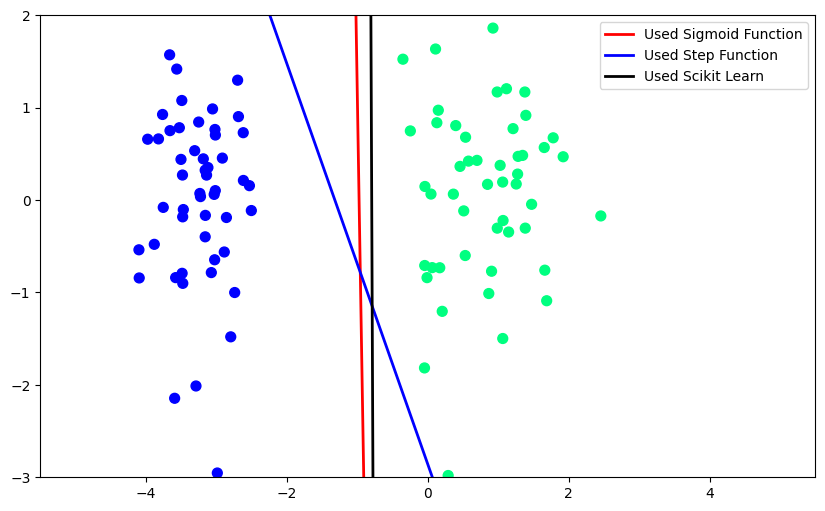

In [178]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=50)
plt.plot(x_input, y_input,c='r',  label='Used Sigmoid Function', linewidth=2)
plt.plot(x_input1, y_input1,c='b', label='Used Step Function',linewidth=2)
plt.plot(x_input2, y_input2,c='black', label='Used Scikit Learn',linewidth=2)
plt.legend()
plt.ylim(-3,2)